In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
 import numpy as np
import pandas as pd
import datetime as dt


In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
engine= create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
Base= automap_base()

In [6]:
Base.prepare(engine, reflect=True)

In [7]:
Base.classes.keys()

['measurement', 'station']

In [8]:
Measurement= Base.classes.measurement
Station= Base.classes.station

In [9]:
session= Session(engine)

In [10]:
Most_recent= session.query(Measurement.date).order_by(Measurement.date.desc()).first()

In [11]:
one_year= dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [12]:
precip = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > one_year).\
order_by(Measurement.date).all()

In [13]:
Precip_df= pd.DataFrame(precip)
Precip_df

,0,1
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [14]:
Precip= Precip_df.rename(columns={0:'Date',1:'Prcp'}, inplace=False)
Precip

,Date,Prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [15]:
Precip.set_index('Date')

,Prcp
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


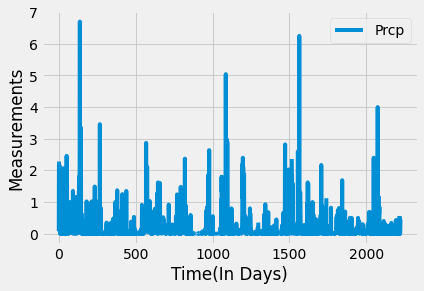

In [17]:
Rain= Precip.plot()
Rain.set_ylabel('Measurements')
Rain.set_xlabel('Time(In Days)')
plt.show()

In [18]:
Precip.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [27]:
station= session.query(Measurement.station).group_by(Measurement.station).count()
station

9

In [38]:
Stat_count = [Measurement.station,func.count(Measurement.id)]
Most_active = session.query(*Stat_count).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
Most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
Temp_count = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
Temp_info = session.query(*Temp_count).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
Temp_info

(54.0, 85.0, 71.66378066378067)

In [40]:
session.close()